# Covid19_India_Analysis(Basic)


I took two datasets for basic covid19 analysis
Data Source :- Kaggle


Firstly lets import all the required libraries for cleaing,analyzing,visualizing our data
I used warnings library so that all the warnings are ignored and are not shown here.

In [230]:
%matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: Qt5Agg


# Importing our first dataset

In [288]:
df=pd.read_csv('covid_19_india.csv') 
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3562,3563,29/06/20,8:00 AM,Tripura,-,-,1079,1,1346
3563,3564,29/06/20,8:00 AM,Uttarakhand,-,-,2018,38,2823
3564,3565,29/06/20,8:00 AM,Uttar Pradesh,-,-,14808,660,22147
3565,3566,29/06/20,8:00 AM,West Bengal,-,-,11193,639,17283


There were records starting from 30/01/2020 till 29/06/2020. I took records till 25/06/2020 also converted data type for time.

In [173]:
covid_latest = df[df['Date']=='25/06/20']
covid_latest['Date'] = pd.to_datetime(covid_latest['Date'])
covid_latest

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3387,3388,2020-06-25,8:00 AM,Andaman and Nicobar Islands,-,-,43,0,56
3388,3389,2020-06-25,8:00 AM,Andhra Pradesh,-,-,4779,124,10331
3389,3390,2020-06-25,8:00 AM,Arunachal Pradesh,-,-,38,0,158
3390,3391,2020-06-25,8:00 AM,Assam,-,-,3958,9,6198
3391,3392,2020-06-25,8:00 AM,Bihar,-,-,6113,57,8209
3392,3393,2020-06-25,8:00 AM,Chandigarh,-,-,323,6,420
3393,3394,2020-06-25,8:00 AM,Chhattisgarh,-,-,1627,12,2419
3394,3395,2020-06-25,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,30,0,120
3395,3396,2020-06-25,8:00 AM,Delhi,-,-,41437,2365,70390
3396,3397,2020-06-25,8:00 AM,Goa,-,-,289,2,951


Making data look more readable by making proper index

In [174]:
len(covid_latest)

36

In [175]:
index = [i for i in range(1,37)]
covid_latest['Sno'] = index
covid_latest = covid_latest.set_index('Sno')

In [176]:
covid_latest

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-06-25,8:00 AM,Andaman and Nicobar Islands,-,-,43,0,56
2,2020-06-25,8:00 AM,Andhra Pradesh,-,-,4779,124,10331
3,2020-06-25,8:00 AM,Arunachal Pradesh,-,-,38,0,158
4,2020-06-25,8:00 AM,Assam,-,-,3958,9,6198
5,2020-06-25,8:00 AM,Bihar,-,-,6113,57,8209
6,2020-06-25,8:00 AM,Chandigarh,-,-,323,6,420
7,2020-06-25,8:00 AM,Chhattisgarh,-,-,1627,12,2419
8,2020-06-25,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,30,0,120
9,2020-06-25,8:00 AM,Delhi,-,-,41437,2365,70390


Dropping all the unnecessary columns and a row, which gives no value to analysis.

In [177]:
covid_latest1 = covid_latest.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Time'],axis=1)
covid_latest1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,
1,2020-06-25,Andaman and Nicobar Islands,43,0,56
2,2020-06-25,Andhra Pradesh,4779,124,10331
3,2020-06-25,Arunachal Pradesh,38,0,158
4,2020-06-25,Assam,3958,9,6198
5,2020-06-25,Bihar,6113,57,8209
6,2020-06-25,Chandigarh,323,6,420
7,2020-06-25,Chhattisgarh,1627,12,2419
8,2020-06-25,Dadra and Nagar Haveli and Daman and Diu,30,0,120
9,2020-06-25,Delhi,41437,2365,70390


In [178]:
covid_latest2 = covid_latest1.drop(36)

In [179]:
covid_latest2

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,
1,2020-06-25,Andaman and Nicobar Islands,43,0,56
2,2020-06-25,Andhra Pradesh,4779,124,10331
3,2020-06-25,Arunachal Pradesh,38,0,158
4,2020-06-25,Assam,3958,9,6198
5,2020-06-25,Bihar,6113,57,8209
6,2020-06-25,Chandigarh,323,6,420
7,2020-06-25,Chhattisgarh,1627,12,2419
8,2020-06-25,Dadra and Nagar Haveli and Daman and Diu,30,0,120
9,2020-06-25,Delhi,41437,2365,70390


Creating a column for recovery rate for all states (rounded upto 2 decimal digits).

In [287]:
covid_latest2['Recovery Rate'] = ((covid_latest2['Cured'] / covid_latest2['Confirmed']) *100).round(2)
covid_latest2

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Recovery Rate
Sno,,,,,,
1,2020-06-25,Andaman and Nicobar Islands,43,0,56,76.79
2,2020-06-25,Andhra Pradesh,4779,124,10331,46.26
3,2020-06-25,Arunachal Pradesh,38,0,158,24.05
4,2020-06-25,Assam,3958,9,6198,63.86
5,2020-06-25,Bihar,6113,57,8209,74.47
6,2020-06-25,Chandigarh,323,6,420,76.90
7,2020-06-25,Chhattisgarh,1627,12,2419,67.26
8,2020-06-25,Dadra and Nagar Haveli and Daman and Diu,30,0,120,25.00
9,2020-06-25,Delhi,41437,2365,70390,58.87


For visualizing I took states with minimum 5000 confirmed cases as a parameter.

In [181]:
check = covid_latest2[covid_latest2['Confirmed']>=5000]
check

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Recovery Rate
Sno,,,,,,
2,2020-06-25,Andhra Pradesh,4779,124,10331,46.26
4,2020-06-25,Assam,3958,9,6198,63.86
5,2020-06-25,Bihar,6113,57,8209,74.47
9,2020-06-25,Delhi,41437,2365,70390,58.87
11,2020-06-25,Gujarat,21088,1735,28943,72.86
12,2020-06-25,Haryana,6925,188,12010,57.66
14,2020-06-25,Jammu and Kashmir,3818,88,6422,59.45
16,2020-06-25,Karnataka,6151,164,10118,60.79
19,2020-06-25,Madhya Pradesh,9473,534,12448,76.10


Sorting all the values from higher to lower in order of recovery rate  and storing the top 7 values for visualization.
From the graph below we can see Rajasthan has the highest recovery rate with almost 79% followed by MadhyaPradesh,Bihar,
Gujarat,Odisha,
UttarPradesh,WestBengal

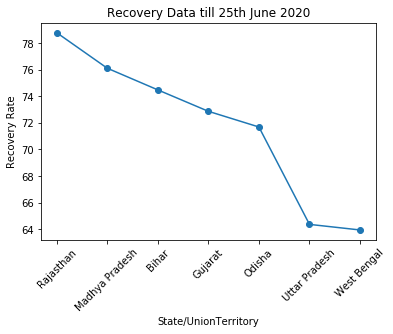

In [290]:
graph_recovery_data = check.sort_values('Recovery Rate', ascending = False)[:7]
x = graph_recovery_data['State/UnionTerritory']
y = graph_recovery_data['Recovery Rate']
plt.xlabel('State/UnionTerritory')
plt.ylabel('Recovery Rate')
plt.title('Recovery Data till 25th June 2020')
plt.xticks(rotation=45)
plt.scatter(x,y)
plt.plot(x,y)

For taking the number of Total Tests in different states and union territories I took another dataset from kaggle 

In [184]:
covid_test_state = pd.read_csv('covid19_test_state.csv')
covid_test_state

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Num Calls State Helpline,Source1,Unnamed: 21,Source2,Unnamed: 23,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210,181.0,NaN,NaN,NaN,...,NaN,https://t.me/indiacovid/2550,NaN,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,340.0,https://t.me/indiacovid/3781,NaN,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,471.0,https://t.me/indiacovid/4925,NaN,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,25/06/2020,West Bengal,439258.0,Tested,15648.0,NaN,NaN,NaN,7865.0,Government,...,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://www.wbhealth.gov.in/pages/corona/bulletin,NaN,3.56%,4.53,4533.0,28.0,96906000.0
2594,26/06/2020,West Bengal,448795.0,Tested,16190.0,NaN,NaN,NaN,7330.0,Government,...,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://www.wbhealth.gov.in/pages/corona/bulletin,NaN,3.61%,4.63,4631.0,28.0,96906000.0
2595,27/06/2020,West Bengal,458343.0,Tested,16711.0,NaN,NaN,NaN,7181.0,Government,...,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://www.wbhealth.gov.in/pages/corona/bulletin,NaN,3.65%,4.73,4730.0,27.0,96906000.0
2596,28/06/2020,West Bengal,468906.0,Tested,17283.0,NaN,NaN,NaN,6937.0,Government,...,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://www.wbhealth.gov.in/pages/corona/bulletin,NaN,3.69%,4.84,4839.0,27.0,96906000.0


# Removing unnecessary columns

Taking the same date 25-06-2020 like previous dataset

In [257]:
covid_test_state['Updated On'] = pd.to_datetime(covid_test_state['Updated On'])
covid_test_state = covid_test_state[covid_test_state['Updated On'] == '2020-06-25']
covid_test_state

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Num Calls State Helpline,Source1,Unnamed: 21,Source2,Unnamed: 23,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
42,2020-06-25,Andaman and Nicobar Islands,14277.0,Samples Sent,59.0,NaN,223.0,NaN,6.0,Institutional,...,NaN,https://dhs.andaman.gov.in/NewEvents/306.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2020-06-25,Andhra Pradesh,769319.0,Tested,10884.0,758435,NaN,NaN,NaN,NaN,...,NaN,https://twitter.com/ArogyaAndhra/status/127604...,NaN,NaN,NaN,1.41%,14.73,14732.0,71.0,52221000.0
195,2020-06-25,Arunachal Pradesh,21274.0,Samples Collected,172.0,19298,1441.0,NaN,NaN,NaN,...,NaN,https://twitter.com/DirectorateofHS/status/127...,NaN,NaN,NaN,0.81%,14.14,14145.0,124.0,1504000.0
263,2020-06-25,Assam,351753.0,Tested,6646.0,NaN,NaN,NaN,NaN,NaN,...,104.0,https://twitter.com/himantabiswa/status/127617...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,2020-06-25,Bihar,181737.0,Tested,8381.0,NaN,NaN,NaN,NaN,NaN,...,NaN,https://twitter.com/PIB_Patna/status/127610729...,NaN,NaN,NaN,4.61%,1.52,1521.0,22.0,119520000.0
428,2020-06-25,Chandigarh,7072.0,Tested,423.0,6618,29.0,NaN,NaN,NaN,...,NaN,https://t.me/Covid19india_Auxiliary_Test_Data/654,NaN,NaN,NaN,5.98%,6.00,5998.0,17.0,1179000.0
504,2020-06-25,Chhattisgarh,142090.0,Tested,2456.0,NaN,NaN,NaN,NaN,NaN,...,NaN,https://twitter.com/HealthCgGov/status/1276180...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,2020-06-25,Dadra and Nagar Haveli and Daman and Diu,30188.0,Samples Collected,154.0,29015,999.0,NaN,590.0,Facility,...,NaN,https://dddcovid19.in/uploads/report/BulletinD...,NaN,https://dddcovid19.in/,NaN,NaN,NaN,NaN,NaN,NaN
649,2020-06-25,Delhi,438012.0,Tested,73780.0,NaN,NaN,NaN,NaN,NaN,...,1031.0,https://delhifightscorona.in/wp-content/themes...,NaN,https://delhifightscorona.in/,NaN,NaN,NaN,NaN,NaN,NaN
726,2020-06-25,Goa,58584.0,Samples Sent,995.0,NaN,NaN,NaN,11046.0,Facility,...,NaN,https://twitter.com/DHS_Goa/status/12761740450...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
covid_test_state.columns

Index(['Updated On', 'State', 'Total Tested', 'Tag (Total Tested)', 'Positive',
       'Negative', 'Unconfirmed', 'Cumulative People In Quarantine',
       'Total People Currently in Quarantine', 'Tag (People in Quarantine)',
       'Total People Released From Quarantine', 'People in ICU',
       'People on Ventilators', 'Num Isolation Beds', 'Num ICU Beds',
       'Num Ventilators', 'Total PPE', 'Total N95 Masks',
       'Corona Enquiry Calls', 'Num Calls State Helpline', 'Source1',
       'Unnamed: 21', 'Source2', 'Unnamed: 23', 'Test positivity rate',
       'Tests per thousand', 'Tests per million', 'Tests per positive case',
       'Population NCP 2019 Projection'],
      dtype='object')

In [187]:
covid_test_state1 = covid_test_state.drop(['Updated On','Tag (Total Tested)', 'Positive',
       'Negative', 'Unconfirmed', 'Cumulative People In Quarantine',
       'Total People Currently in Quarantine', 'Tag (People in Quarantine)',
       'Total People Released From Quarantine', 'People in ICU',
       'People on Ventilators', 'Num Isolation Beds', 'Num ICU Beds',
       'Num Ventilators', 'Total PPE', 'Total N95 Masks',
       'Corona Enquiry Calls', 'Num Calls State Helpline', 'Source1',
       'Unnamed: 21', 'Source2', 'Unnamed: 23', 'Test positivity rate',
       'Tests per thousand', 'Tests per million', 'Tests per positive case',
       'Population NCP 2019 Projection'], axis=1)
covid_test_state1

,State,Total Tested
42,Andaman and Nicobar Islands,14277.0
123,Andhra Pradesh,769319.0
195,Arunachal Pradesh,21274.0
263,Assam,351753.0
347,Bihar,181737.0
428,Chandigarh,7072.0
504,Chhattisgarh,142090.0
568,Dadra and Nagar Haveli and Daman and Diu,30188.0
649,Delhi,438012.0
726,Goa,58584.0


For merging the two data sets I'm changing the column name for the second dataset's state. To make it same as previous one.

In [214]:
covid_test_state1.rename(columns={'State':'State/UnionTerritory'}, inplace= True)
# covid19_final_data = pd.merge(covid_latest2, covid_test_state1, on='State/UnionTerittory', how='outer')
covid_test_state1

,State/UnionTerritory,Total Tested
no,,
1,Andaman and Nicobar Islands,14277.0
2,Andhra Pradesh,769319.0
3,Arunachal Pradesh,21274.0
4,Assam,351753.0
5,Bihar,181737.0
6,Chandigarh,7072.0
7,Chhattisgarh,142090.0
8,Dadra and Nagar Haveli and Daman and Diu,30188.0
9,Delhi,438012.0


In [215]:
index = [i for i in range(1,36)]
covid_test_state1['no'] = index
covid_test_state1 = covid_test_state1.set_index('no')
covid_latest2.dtypes

Date                    datetime64[ns]
State/UnionTerritory            object
Cured                            int64
Deaths                           int64
Confirmed                        int64
Recovery Rate                  float64
dtype: object

Merging the two datasets on same column name.

In [277]:
covid19_final_data = pd.merge(covid_latest2,covid_test_state1,on='State/UnionTerritory',how='outer')

In [278]:
covid19_final_data

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Recovery Rate,Total Tested
0,2020-06-25,Andaman and Nicobar Islands,43,0,56,76.79,14277.0
1,2020-06-25,Andhra Pradesh,4779,124,10331,46.26,769319.0
2,2020-06-25,Arunachal Pradesh,38,0,158,24.05,21274.0
3,2020-06-25,Assam,3958,9,6198,63.86,351753.0
4,2020-06-25,Bihar,6113,57,8209,74.47,181737.0
5,2020-06-25,Chandigarh,323,6,420,76.90,7072.0
6,2020-06-25,Chhattisgarh,1627,12,2419,67.26,142090.0
7,2020-06-25,Dadra and Nagar Haveli and Daman and Diu,30,0,120,25.00,30188.0
8,2020-06-25,Delhi,41437,2365,70390,58.87,438012.0
9,2020-06-25,Goa,289,2,951,30.39,58584.0


# Visualization

In [ ]:
From the graph below we can see Tamil Nadu has highest no. of testings followed bY Maharashtra, Arunachal Pradesh, Rajasthan,
Uttar Pradesh,Karnataka,West Bengal

<BarContainer object of 7 artists>

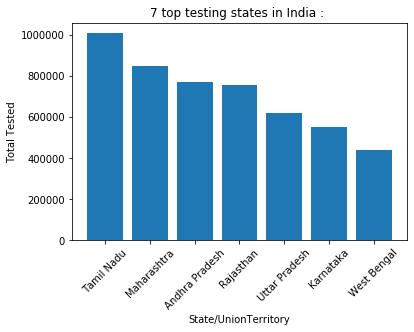

In [285]:
covid_final_subset = covid19_final_data.sort_values(['Total Tested'],ascending = False)[:7]
plt.xlabel('State/UnionTerritory')
plt.ylabel('Total Tested')
x = covid_final_subset['State/UnionTerritory']
y = covid_final_subset['Total Tested']
plt.xticks(rotation=45)
plt.title('7 top testing states in India : ')
plt.bar(x,y)

# Thankyou